# **「PyTorch入門 2. データセットとデータローダー」**

# **Datasets & Dataloaders**
PyTorchにはデータセットを扱う基本要素が2つあります。

torch.utils.data.DataLoaderと、torch.utils.data.Datasetです

* Datasetにはサンプルとそれに対応するラベルが格納され、DataLoaderにはイテレート処理が可能なデータが格納されます。

* DataLoaderは、サンプルを簡単に利用できるように、Datasetをイテレート処理可能なものへとラップします。

## **Datasetの読み込み**

FashionMNIST Datasetを読み込む際には、以下のパラメータを使用します。

* root ：訓練/テストデータが格納されているパスを指定
* train ：訓練データまたはテストデータセットを指定
* download=True：root にデータが存在しない場合は、インターネットからデータをダウンロードを指定
* ransform と target_transform：特徴量とラベルの変換を指定

In [1]:
%matplotlib inline

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt


# 下载训练数据
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# 下载测试数据
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:14<00:00, 1822800.66it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 116974.56it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:05<00:00, 786261.64it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5339336.55it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## **データセットの反復処理と可視化**
Datasetの特定indexを指定する際には、リスト操作と同様に、training_data[index]と記載します。

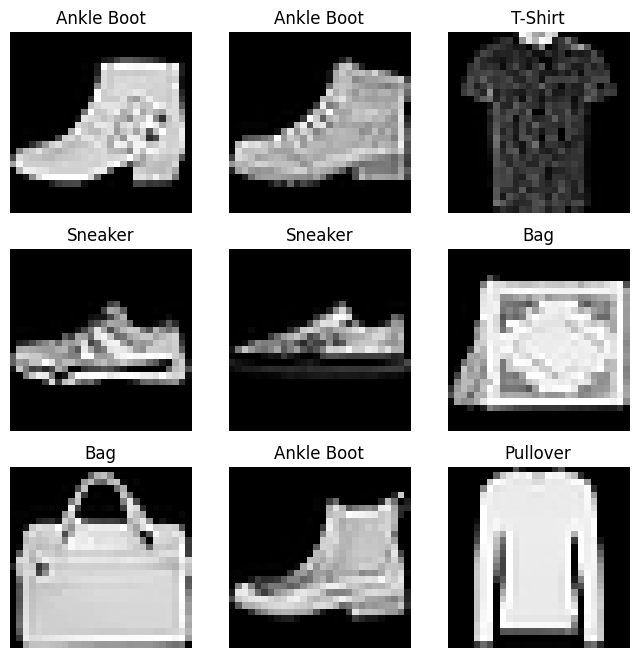

In [8]:
# 声明标签
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# 规定每幅图片的尺寸大小
figure = plt.figure(figsize=(8, 8))

# 创建一个3*3的图片矩阵
cols, rows = 3, 3


for i in range(1, cols * rows + 1):
    # 在training_data里随机抽取一个样本
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    # torch.randint(len(training_data), size=(1,))
    # 在 [0, len(training_data)-1] 范围内生成一个随机整数
    # size(1,) 并返回一个包含该随机整数的张量

    # 通过index返回图片&标签
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    # img.squeeze() 移除维度为 1 的轴 如果 img 的形状是 (1, 28, 28)
    # img.squeeze() 后的形状为 (28, 28)
    # cmap="gray" 将图片设置为灰度图

plt.show()

## **カスタムデータセットの作成**(自定义数据集)
自分でカスタムしたDatasetクラスを作る際には、`__init__`、`__len__`、`__getitem__`の3つの関数は必ず実装する必要があります。

In [9]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):

  # 定义__init__
  # 构造函数
  # __init__函数仅在数据集对象实例化时执行一次
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
      self.img_labels = pd.read_csv(annotations_file)
      self.img_dir = img_dir
      self.transform = transform
      self.target_transform = target_transform

  # 定义__len__
  # 返回数据集的样本个数
  def __len__(self):
      return len(self.img_labels)

  # 定义__getitem__
  # 通过index查找相应的数据
  def __getitem__(self, idx):

      # 通过index读取图片
      img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])

      # 通过read_image()将图片转换为张量
      image = read_image(img_path)

      # 将数据打上对应标签
      label = self.img_labels.iloc[idx, 1]
      if self.transform:
          image = self.transform(image)
      if self.target_transform:
          label = self.target_transform(label)

      sample = {"image": image, "label": label}
      # 图片&标签

      return sample

## **DataLoaderの使用方法**

想把``Dataset``中的样本,标签抽取出来。

但是，在训练模型时,我们希望以 ``小批量(minibatches)``的方式处理数据,并在每一个``纪元(epoch)``对数据进行洗牌以防止过拟合

优化循环的每次迭代叫做一个``Epoch(时期、纪元)``

通过``DataLoader``实现以上需求

In [10]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
# batch_size 每个批次中返回的样本数量
# shuffle = True 每个训练周期，将数据集中的样本随机打乱

test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## **DataLoaderを用いた繰り返し処理**

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


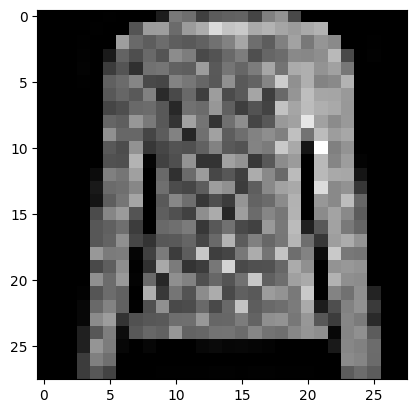

Label: 2


In [11]:
# Display image and label.

train_features, train_labels = next(iter(train_dataloader))
# iter()显式获取其迭代器
# 获取数据加载器的下一个批次

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
# squeeze()移除维度为1的轴

label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")